In [ ]:
!pip install ultralytics
!pip install squarify

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 646.6/646.6 kB 4.2 MB/s eta 0:00:00


In [ ]:
# Importing the required libraries
from ultralytics import YOLO
import squarify
import matplotlib.pyplot as plt
import cv2
import os
import random
import pandas as pd
import matplotlib.image as mpimg
import seaborn as sns

sns.set_style('darkgrid')

%matplotlib inline

In [ ]:
!unzip /content/archive.zip

Archive:  /content/archive.zip
  inflating: README.dataset.txt      
  inflating: README.roboflow.txt     
  inflating: data.yaml               
  inflating: test/images/1-3-46-670589-33-1-63703718086120120200001-5487554579919763006_png_jpg.rf.9fd67251e99a47dbe83a5db6efe6c016.jpg  
  inflating: test/images/1-3-46-670589-33-1-63705534438365105500001-5275982036206127404_png_jpg.rf.365c4daf2b772012fe47e07b9daec86e.jpg  
  inflating: test/images/1-3-46-670589-33-1-63705540012666937300001-5673688970564737961_png_jpg.rf.15cca2fecc5f56865de3eb405476b90d.jpg  
  inflating: test/images/1-3-46-670589-33-1-63705542123217653900001-5305208767418446842_png_jpg.rf.d6f32a0ac819e4f2a870edfc1ce8079b.jpg  
  inflating: test/images/1-3-46-670589-33-1-63705542123253656000001-4874858110489948158_png_jpg.rf.d79767eb8378783858ea648a8852c859.jpg  
  inflating: test/images/1-3-46-670589-33-1-63706052409136049800001-4885266517035478638_png_jpg.rf.403057fc6d27ba2b8a1020faf23ea6e8.jpg  
  inflating: test/images/1-

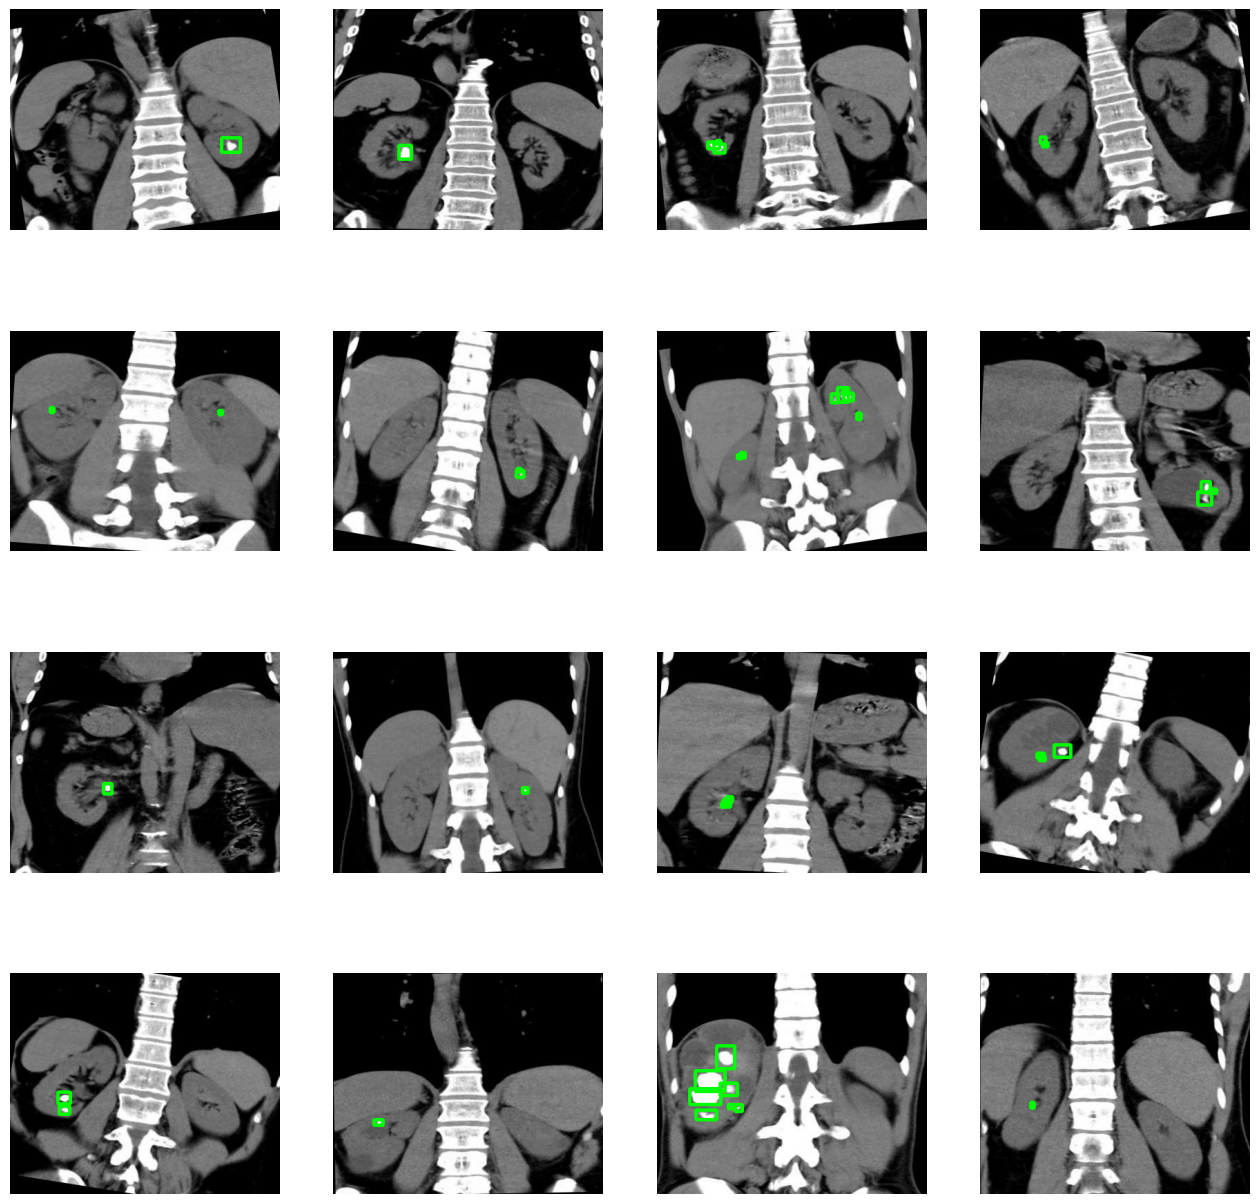

In [ ]:
# Define the paths to the images and labels directories
train_images = "/content/train/images"
train_labels = "/content/train/labels"

test_images = "/content/test/images"
test_labels = "/content/test/labels"

val_images = "/content/valid/images"
val_labels = "/content/valid/labels"

# Get a list of all the image files in the training images directory
image_files = os.listdir(train_images)

# Choose 16 random image files from the list
random_images = random.sample(image_files, 16)

# Set up the plot
fig, axs = plt.subplots(4, 4, figsize=(16, 16))
# Loop over the random images and plot the object detections
for i, image_file in enumerate(random_images):
    row = i // 4
    col = i % 4

    # Load the image
    image_path = os.path.join(train_images, image_file)
    image = cv2.imread(image_path)

    # Load the labels for this image
    label_file = os.path.splitext(image_file)[0] + ".txt"
    label_path = os.path.join(train_labels, label_file)
    with open(label_path, "r") as f:
        labels = f.read().strip().split("\n")

    # Loop over the labels and plot the object detections
    # Loop over the labels and plot the object detections
    for label in labels:
        if len(label.split()) != 5:
            continue
        class_id, x_center, y_center, width, height = map(float, label.split())
        x_min = int((x_center - width/2) * image.shape[1])
        y_min = int((y_center - height/2) * image.shape[0])
        x_max = int((x_center + width/2) * image.shape[1])
        y_max = int((y_center + height/2) * image.shape[0])
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 3)


    # Show the image with the object detections
    axs[row, col].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    axs[row, col].axis('off')

plt.show()


In [ ]:
# Loading a pretrained model
model = YOLO('yolov8x.pt')

100%|██████████| 131M/131M [00:00<00:00, 294MB/s]


In [ ]:
import locale
locale.getpreferredencoding = lambda: "UTF-8"
# Training the model
model.train(data = '/content/data.yaml',
            seed = 42,
            epochs = 5,
            lr0=0.001)

Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=/content/data.yaml, epochs=5, patience=50, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=42, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, show=False, save_frames=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, show_boxes=True, line_width=None, format=torchscript, k

100%|██████████| 755k/755k [00:00<00:00, 14.0MB/s]


Overriding model.yaml nc=80 with nc=1

                   from  n    params  module                                       arguments                     
  0                  -1  1      2320  ultralytics.nn.modules.conv.Conv             [3, 80, 3, 2]                 
  1                  -1  1    115520  ultralytics.nn.modules.conv.Conv             [80, 160, 3, 2]               
  2                  -1  3    436800  ultralytics.nn.modules.block.C2f             [160, 160, 3, True]           
  3                  -1  1    461440  ultralytics.nn.modules.conv.Conv             [160, 320, 3, 2]              
  4                  -1  6   3281920  ultralytics.nn.modules.block.C2f             [320, 320, 6, True]           
  5                  -1  1   1844480  ultralytics.nn.modules.conv.Conv             [320, 640, 3, 2]              
  6                  -1  6  13117440  ultralytics.nn.modules.block.C2f             [640, 640, 6, True]           
  7                  -1  1   3687680  ultralytics

100%|██████████| 6.23M/6.23M [00:00<00:00, 77.9MB/s]


AMP: checks passed ✅


train: Scanning /content/train/labels... 1054 images, 1 backgrounds, 0 corrupt: 100%|██████████| 1054/1054 [00:00<00:00, 2108.13it/s]


train: New cache created: /content/train/labels.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01), CLAHE(p=0.01, clip_limit=(1, 4.0), tile_grid_size=(8, 8))


val: Scanning /content/valid/labels... 123 images, 0 backgrounds, 0 corrupt: 100%|██████████| 123/123 [00:00<00:00, 1454.66it/s]

val: New cache created: /content/valid/labels.cache


Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.001' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 97 weight(decay=0.0), 104 weight(decay=0.0005), 103 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to runs/detect/train
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5      13.5G      2.375      3.398      1.439         41        640: 100%|██████████| 66/66 [01:17<00:00,  1.17s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:04<00:00,  1.02s/it]

                   all        123        325          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5      13.9G      2.228      1.446      1.374         39        640: 100%|██████████| 66/66 [01:18<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.14it/s]

                   all        123        325     0.0158      0.295     0.0069    0.00235



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5      13.9G      2.213       1.36      1.361         47        640: 100%|██████████| 66/66 [01:18<00:00,  1.19s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.23it/s]

                   all        123        325      0.589      0.495      0.475      0.178



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5      13.9G      2.169      1.202      1.326         33        640: 100%|██████████| 66/66 [01:18<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.17it/s]

                   all        123        325      0.665      0.572      0.606      0.218



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5        14G      2.116      1.184      1.338         49        640: 100%|██████████| 66/66 [01:18<00:00,  1.18s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00:00,  1.20it/s]

                   all        123        325      0.652      0.542      0.558      0.223



5 epochs completed in 0.132 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 136.7MB
Optimizer stripped from runs/detect/train/weights/best.pt, 136.7MB

Validating runs/detect/train/weights/best.pt...
Ultralytics YOLOv8.0.221 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68124531 parameters, 0 gradients, 257.4 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:06<00:00,  1.74s/it]


                   all        123        325      0.668      0.572      0.607      0.218
Speed: 0.5ms preprocess, 23.4ms inference, 0.0ms loss, 5.1ms postprocess per image
Results saved to runs/detect/train


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x7880e828c670>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.048048, 


0: 640x640 6 Tas_Vars, 89.7ms
Speed: 2.7ms preprocess, 89.7ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 3 Tas_Vars, 55.6ms
Speed: 4.3ms preprocess, 55.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Tas_Var, 55.7ms
Speed: 4.6ms preprocess, 55.7ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Tas_Vars, 56.6ms
Speed: 3.3ms preprocess, 56.6ms inference, 2.2ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 4 Tas_Vars, 57.5ms
Speed: 4.1ms preprocess, 57.5ms inference, 2.8ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Tas_Vars, 56.2ms
Speed: 4.0ms preprocess, 56.2ms inference, 2.1ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 1 Tas_Var, 57.0ms
Speed: 3.8ms preprocess, 57.0ms inference, 2.0ms postprocess per image at shape (1, 3, 640, 640)

0: 640x640 2 Tas_Vars, 54.5ms
Speed: 3.9ms preprocess, 54.5ms inference, 2.6ms postprocess per image at s

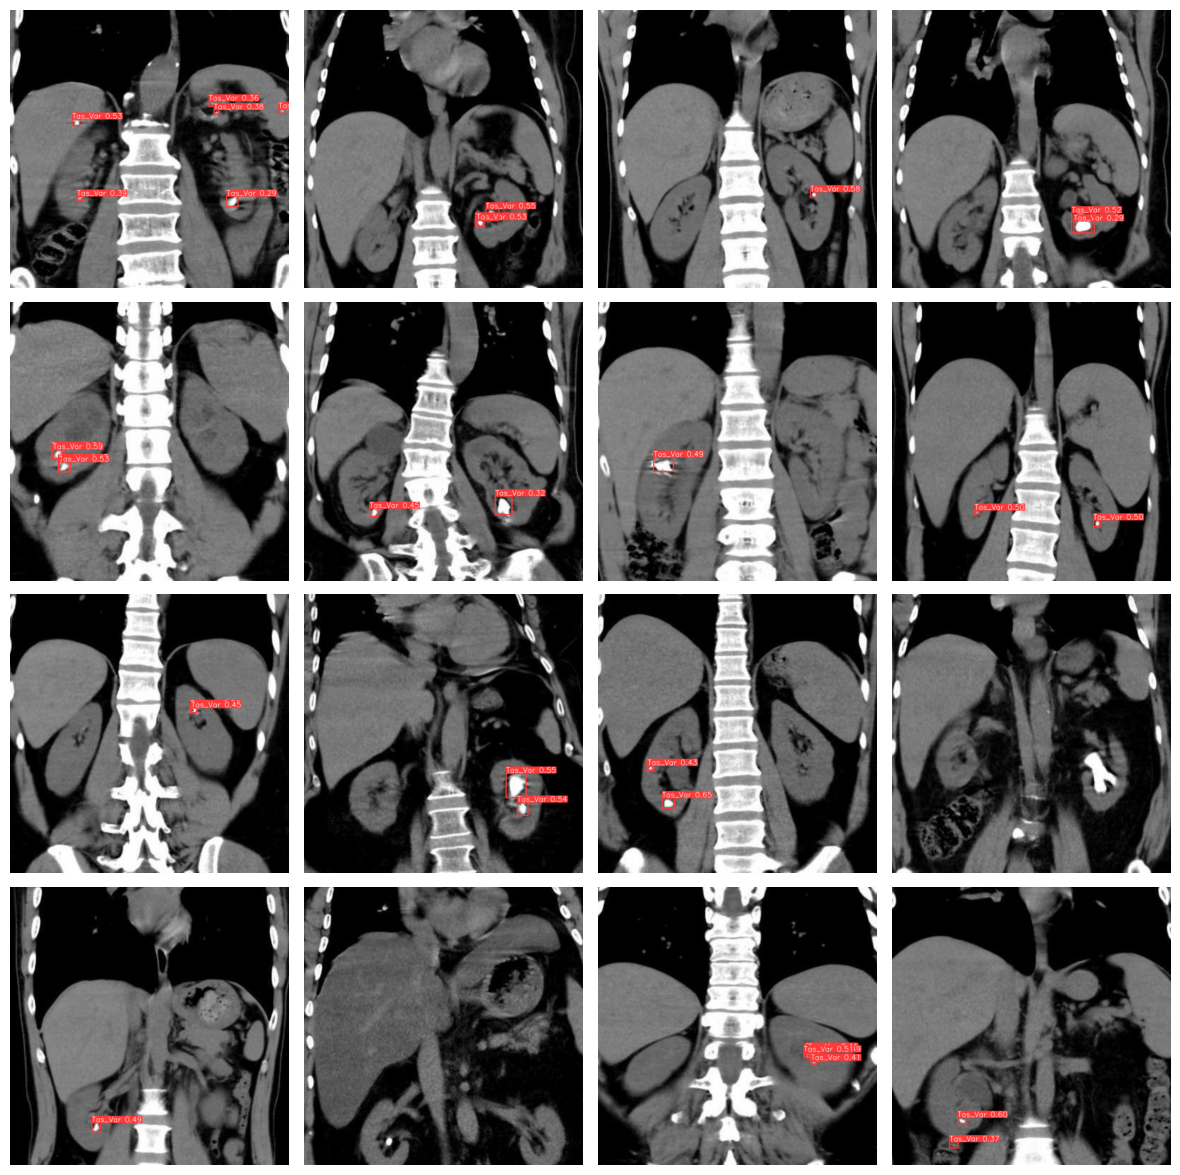

In [ ]:
def ship_detect(img_path):

    # Read the image
    img = cv2.imread(img_path)
    img = cv2.resize(img, (768, 768))

    # Pass the image through the detection model and get the result
    detect_result = model(img)
    # Plot the detections
    detect_img = detect_result[0].plot()

    # Convert the image to RGB format
    detect_img = cv2.cvtColor(detect_img, cv2.COLOR_BGR2RGB)

    return detect_img
import random

# Define the directory where the custom images are stored
custom_image_dir = '/content/test/images'

# Get the list of image files in the directory
image_files = os.listdir(custom_image_dir)

# Select 16 random images from the list
selected_images = random.sample(image_files, 16)

# Create a figure with subplots for each image
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(15, 15))

# Iterate over the selected images and plot each one
for i, img_file in enumerate(selected_images):

    # Compute the row and column index of the current subplot
    row_idx = i // 4
    col_idx = i % 4

    # Load the current image and run object detection
    img_path = os.path.join(custom_image_dir, img_file)
    detect_img = ship_detect(img_path)

    # Plot the current image on the appropriate subplot
    axes[row_idx, col_idx].imshow(detect_img)
    axes[row_idx, col_idx].axis('off')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.05, hspace=0.05)

In [ ]:
def calculate_iou(box1, box2):
    """
    Calcula el Índice de Superposición de Unión (IoU) entre dos cajas.

    box1 y box2 deben estar en el formato (x, y, w, h),
    donde (x, y) son las coordenadas del esquina superior izquierda,
    y (w, h) son el ancho y la altura de la caja.
    """
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2

    # Calcular las coordenadas de la intersección
    x_intersection = max(x1, x2)
    y_intersection = max(y1, y2)
    w_intersection = min(x1 + w1, x2 + w2) - x_intersection
    h_intersection = min(y1 + h1, y2 + h2) - y_intersection

    # Calcular el área de la intersección
    area_intersection = max(0, w_intersection) * max(0, h_intersection)

    # Calcular el área de la unión
    area_union = w1 * h1 + w2 * h2 - area_intersection

    # Calcular el IoU
    iou = area_intersection / area_union if area_union > 0 else 0.0

    return iou

# Ejemplo de uso
box1 = (0, 0, 4, 4)
box2 = (2, 2, 4, 4)
iou = calculate_iou(box1, box2)

print(f"IoU: {iou}")

IoU: 0.14285714285714285
